In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB






### Q1 Read the input file and check the data dimension

In [2]:
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
germancredit_df = pd.read_csv('german_credit.csv')
germancredit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [4]:
germancredit_df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


## *Lets build a Ensemble model but need to modify the dataset first*


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [5]:
# Print Shape of model data

In [6]:
germancredit_df.shape

(1000, 21)

In [7]:
germancredit_df_account_check_status = pd.get_dummies(germancredit_df["account_check_status"])
germancredit_df_credit_history  = pd.get_dummies(germancredit_df["credit_history"])
germancredit_df_purpose  = pd.get_dummies(germancredit_df["purpose"])
germancredit_df_savings  = pd.get_dummies(germancredit_df["savings"])
germancredit_df_present_emp_since  = pd.get_dummies(germancredit_df["present_emp_since"])
germancredit_df_personal_status_sex = pd.get_dummies(germancredit_df["personal_status_sex"])
germancredit_df_other_debtors = pd.get_dummies(germancredit_df["other_debtors"])
germancredit_df_property  = pd.get_dummies(germancredit_df["property"])
germancredit_df_other_installment_plans  = pd.get_dummies(germancredit_df["other_installment_plans"])
germancredit_df_housing  = pd.get_dummies(germancredit_df["housing"])
germancredit_df_job  = pd.get_dummies(germancredit_df["job"])
germancredit_df_telephone  = pd.get_dummies(germancredit_df["telephone"])
germancredit_df_foreign_worker  = pd.get_dummies(germancredit_df["foreign_worker"])

germancredit_df_working = pd.concat([germancredit_df, germancredit_df_account_check_status, germancredit_df_credit_history,germancredit_df_purpose,germancredit_df_savings,germancredit_df_present_emp_since,germancredit_df_personal_status_sex,germancredit_df_other_debtors,germancredit_df_property,germancredit_df_other_installment_plans,germancredit_df_account_check_status,germancredit_df_housing,germancredit_df_job,germancredit_df_telephone,germancredit_df_foreign_worker], axis=1)
germancredit_df_working.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,own,rent,management/ self-employed/ highly qualified employee/ officer,skilled employee / official,unemployed/ unskilled - non-resident,unskilled - resident,none,"yes, registered under the customers name",no,yes
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,1,0,0,1,0,0,0,1,0,1
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,1,0,0,1,0,0,1,0,0,1
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,1,0,0,0,0,1,1,0,0,1
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,0,0,0,1,0,0,1,0,0,1
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,0,0,0,1,0,0,1,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

In [8]:
germancredit_df_working.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,0 <= ... < 200 DM,< 0 DM,...,own,rent,management/ self-employed/ highly qualified employee/ officer,skilled employee / official,unemployed/ unskilled - non-resident,unskilled - resident,none,"yes, registered under the customers name",no,yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-0.021822,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-0.181203,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-0.161757,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-0.057237,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,0.009065,-0.095359,0.095359,-0.054097,0.054097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
unskilled - resident,-0.021822,-0.181203,-0.161757,-0.057237,0.009065,0.043712,-0.010392,0.145066,0.018041,0.023542,...,0.063003,0.014347,-0.208392,-0.652438,-0.074991,1.000000,0.253720,-0.253720,0.087412,-0.087412
none,0.036466,-0.164718,-0.276995,-0.014413,-0.095359,-0.145259,-0.065553,0.014753,-0.015276,0.067149,...,0.036275,0.049524,-0.385706,0.061289,0.040124,0.253720,1.000000,-1.000000,0.107401,-0.107401
"yes, registered under the customers name",-0.036466,0.164718,0.276995,0.014413,0.095359,0.145259,0.065553,-0.014753,0.015276,-0.067149,...,-0.036275,-0.049524,0.385706,-0.061289,-0.040124,-0.253720,-1.000000,1.000000,-0.107401,0.107401
no,-0.082079,-0.138196,-0.050050,-0.090024,-0.054097,-0.006151,-0.009717,0.077071,-0.059172,0.057751,...,0.018960,0.032849,-0.051858,-0.047292,0.042834,0.087412,0.107401,-0.107401,1.000000,-1.000000


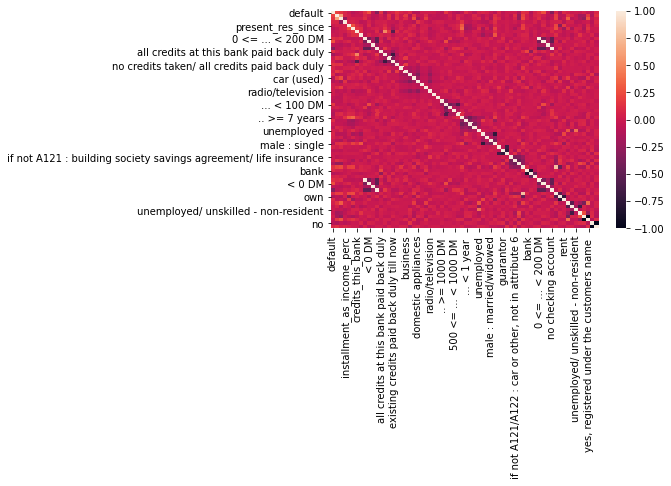

In [9]:
sns.heatmap(germancredit_df_working.corr())

### Drop the original variables which are converted to dummy

In [10]:
germancredit_df_working.drop(['credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','account_check_status','housing','job','telephone','foreign_worker'], inplace=True, axis=1)
germancredit_df_working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 66 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   default                                                           1000 non-null   int64
 1   duration_in_month                                                 1000 non-null   int64
 2   credit_amount                                                     1000 non-null   int64
 3   installment_as_income_perc                                        1000 non-null   int64
 4   present_res_since                                                 1000 non-null   int64
 5   age                                                               1000 non-null   int64
 6   credits_this_bank                                                 1000 non-null   int64
 7   people_under_maintenance                            

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [12]:
x = germancredit_df_working.drop('default',axis=1)
y = germancredit_df_working['default']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [13]:
randomForestClassifier = RandomForestClassifier(n_estimators = 500, n_jobs=2,criterion="entropy",random_state=9999)
randomForestClassifier_Model = randomForestClassifier.fit(X_train,y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [14]:
predictions = randomForestClassifier_Model.predict(X_test)
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()

print("Accuracy score : ", randomForestClassifier_Model.score(X_test, y_test))

Confusion Matrix:
[[196  18]
 [ 55  31]]

Accuracy score :  0.7566666666666667


### Q6 Show the list of the features importance( 1 Marks)

In [15]:
randomForestClassifier_Model.feature_importances_

array([0.07185848, 0.10156461, 0.03804146, 0.03252179, 0.07735615,
       0.01668824, 0.01131967, 0.00925555, 0.01649653, 0.0048001 ,
       0.02722776, 0.00740406, 0.02754906, 0.00892838, 0.01442137,
       0.01169032, 0.00546793, 0.01080692, 0.01786873, 0.01098922,
       0.01367003, 0.00457699, 0.00133353, 0.01334742, 0.00181093,
       0.0009385 , 0.00826888, 0.01836352, 0.00931308, 0.00578086,
       0.01375401, 0.01352607, 0.01348816, 0.01497862, 0.01364985,
       0.00734864, 0.0139641 , 0.00596052, 0.0076271 , 0.01525506,
       0.0074544 , 0.00855709, 0.01058914, 0.01325829, 0.01423244,
       0.01549227, 0.00947514, 0.01375042, 0.01875575, 0.00753739,
       0.00913799, 0.01698383, 0.0048421 , 0.02939936, 0.00646116,
       0.01242075, 0.01087947, 0.01195964, 0.01455072, 0.00173944,
       0.01102677, 0.01350718, 0.01346484, 0.00255212, 0.0027601 ])

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [16]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score

In [28]:
# Use below values
num_folds = 10
seed = 77

In [94]:
#Validate the Random Forest model build above using k fold

validation_df = pd.DataFrame(columns = ['Model', 'Accuracy','Standard Deviation','Confusion Matrix', 'Report'])
X=np.array(X_train)
Y=np.array(y_train)
models = []
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('LogisticRegression', LogisticRegression()))
scoring = 'accuracy'

names = []
results = []
predicted = []
scores = []
confusionMatrices = []
reports = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=num_folds,random_state=seed)

    crossvalidation_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    crossvalidation_predictions = model_selection.cross_val_predict(model, X_test, y_test, cv=kfold, method='predict')
    confusionMatrix = metrics.confusion_matrix(y_test,pd.Series(crossvalidation_predictions))
    report = metrics.classification_report(y_test,pd.Series(crossvalidation_predictions) )

    results.append(crossvalidation_results)
    predicted.append(crossvalidation_predictions)
    confusionMatrices.append(confusionMatrix)
    reports.append(report)
    
    names.append(name)
    validation_df = validation_df.append({'Model': name, 'Accuracy': crossvalidation_results.mean(), 'Standard Deviation': crossvalidation_results.std(),'Confusion Matrix': confusionMatrix, 'Report':report }, ignore_index=True) 


validation_df


,Model,Accuracy,Standard Deviation,Confusion Matrix,Report
0,DecisionTreeClassifier,0.700000,0.082808,"[[161, 53], [43, 43]]",precision recall f1-score ...
1,KNeighborsClassifier,0.678571,0.060017,"[[174, 40], [68, 18]]",precision recall f1-score ...
2,GaussianNB,0.721429,0.062024,"[[150, 64], [29, 57]]",precision recall f1-score ...
3,LogisticRegression,0.752857,0.049508,"[[187, 27], [51, 35]]",precision recall f1-score ...


In [83]:
#Calculate Mean score

In [71]:

validation_df[['Model','Accuracy']]


,Model,Accuracy
0,DecisionTreeClassifier,0.700000
1,KNeighborsClassifier,0.678571
2,GaussianNB,0.721429
3,LogisticRegression,0.752857


In [ ]:
# Calculate score standard deviation using std()

In [72]:
validation_df[['Model','Standard Deviation']]


,Model,Standard Deviation
0,DecisionTreeClassifier,0.067310
1,KNeighborsClassifier,0.060017
2,GaussianNB,0.062024
3,LogisticRegression,0.049508


# Q8 Print the confusion matrix( 1 Marks)

In [78]:
validation_df[['Model','Confusion Matrix']]

,Model,Confusion Matrix
0,DecisionTreeClassifier,"[[162, 52], [44, 42]]"
1,KNeighborsClassifier,"[[174, 40], [68, 18]]"
2,GaussianNB,"[[150, 64], [29, 57]]"
3,LogisticRegression,"[[187, 27], [51, 35]]"


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [93]:
for i in range(len(validation_df)):
    print('Model : ', validation_df['Model'][i])
    print('Report : ',validation_df['Report'][i])


Model :  DecisionTreeClassifier
Report :                precision    recall  f1-score   support

           0       0.79      0.77      0.78       214
           1       0.47      0.50      0.48        86

    accuracy                           0.69       300
   macro avg       0.63      0.64      0.63       300
weighted avg       0.70      0.69      0.70       300

Model :  KNeighborsClassifier
Report :                precision    recall  f1-score   support

           0       0.72      0.81      0.76       214
           1       0.31      0.21      0.25        86

    accuracy                           0.64       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.60      0.64      0.62       300

Model :  GaussianNB
Report :                precision    recall  f1-score   support

           0       0.84      0.70      0.76       214
           1       0.47      0.66      0.55        86

    accuracy                           0.69       300
   macro avg    

### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [100]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [101]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm = RandomForestClassifier(n_estimators=500, n_jobs=5, criterion='entropy',random_state=0)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [102]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.753
Standard deviation:  0.015380362660079114
